In [78]:
import pandas as pd
import numpy as np
df = pd.read_csv('online_shoppers_intention.csv')
rows,columns = df.shape
number_features =len(df.columns)
print (f"\nNumber of rows and columns: {rows,columns}")
print(f"\nTotal number of features :{number_features}")



Number of rows and columns: (12334, 18)

Total number of features :18


# Loading the Dataset
 Load the dataset, follow these steps:

1. Download the dataset from the provided link https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset
2. Extract the files if they are in a compressed format.
3. Use the following code to load the dataset into your environment:

In [79]:
import calendar
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('online_shoppers_intention.csv')
# Display the top 5 rows of the dataset
from IPython.display import display
# Display the top 5 rows of the dataset
display(df.head())


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1.0,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2.0,Returning_Visitor,False,False
2,0.0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3.0,Returning_Visitor,False,False
3,0.0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4.0,Returning_Visitor,False,False
4,0.0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4.0,Returning_Visitor,True,False


 ## 1. Data Cleaning:
o Identify and describe the types of data quality issues present in the dataset. 
(e.g., missing values, duplicates, outliers).

o Implement techniques to handle missing values and justify the chosen methods 
(e.g., imputation, removal).

o Detect and remove duplicate entries in the dataset.

In [80]:
# Identify missing values and describe the data quality of the dataset
missing_values = df.isnull().sum()
print("Missing Values and the :\n", missing_values)

# Identify duplicate entries from the dataset and describe the data quality of the dataset
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Missing Values and the :
 Administrative             1
Administrative_Duration    1
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    2
BounceRates                0
ExitRates                  1
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                1
VisitorType                2
Weekend                    0
Revenue                    1
dtype: int64
Number of duplicate rows: 125


In [81]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=[float, int]).columns  # Select numeric columns

# Mean Imputation for Numeric Data
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Remove any remaining rows with missing values (if any)
df_cleaned = df.dropna()

# Display the cleaned dataset after removing rows with missing values
print("\nData after Removing Rows with Missing Values:")
print(df_cleaned.head())




Data after Removing Rows with Missing Values:
   Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                      0.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                     0.0             1.0                 0.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb               1.0   
1         0

In [82]:
# Remove duplicates from the dataframe
df_no_duplicates = df.drop_duplicates()

# Verify removal of duplicates
print(f"\nNumber of Rows after Removing Duplicates: {df_no_duplicates.shape[0]}")
print(f"Number of Rows Removed: {df.shape[0] - df_no_duplicates.shape[0]}")

# Show the data after duplicates are removed
print("\nData after Removing Duplicates:")
print(df_no_duplicates.head())



Number of Rows after Removing Duplicates: 12209
Number of Rows Removed: 125

Data after Removing Duplicates:
   Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                      0.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                     0.0             1.0                 0.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20

## 2. Data Transformation:
o Perform data normalization or standardization where applicable and explain 
the rationale behind the transformation.


In [83]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[float, int]).columns

# Standardize the numeric columns
scaler = StandardScaler()
df_standardized = df.copy()  # Keep a copy of the full DataFrame
df_standardized[numeric_columns] = scaler.fit_transform(df[numeric_columns])




## 3. Handling Categorical Data:
o Identify categorical variables in the dataset.

o Convert categorical data into numerical formats using techniques like one-hot 
encoding or label encoding. Explain the impact of these transformations on the 
dataset.

In [84]:
# Identify columns that are categorical
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

# Encoding all categorical columns dynamically
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(df_encoded.columns)



Categorical Columns: Index(['Month', 'VisitorType', 'Revenue'], dtype='object')
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Revenue_True'],
      dtype='object')


##  4. Feature Engineering:
o Create new features based on existing data that could potentially improve the 
performance of a machine learning model. Explain your thought process.

o Analyze the importance of these new features using correlation or other 
statistical methods.

                           Avg_Admin_Time_Per_Page  Avg_Product_Time_Per_Page  \
Avg_Admin_Time_Per_Page                   1.000000                   0.121763   
Avg_Product_Time_Per_Page                 0.121763                   1.000000   
Bounce_Exit_Interaction                  -0.138149                  -0.244738   
Revenue_True                              0.079366                   0.067441   

                           Bounce_Exit_Interaction  Revenue_True  
Avg_Admin_Time_Per_Page                  -0.138149      0.079366  
Avg_Product_Time_Per_Page                -0.244738      0.067441  
Bounce_Exit_Interaction                   1.000000     -0.129233  
Revenue_True                             -0.129233      1.000000  


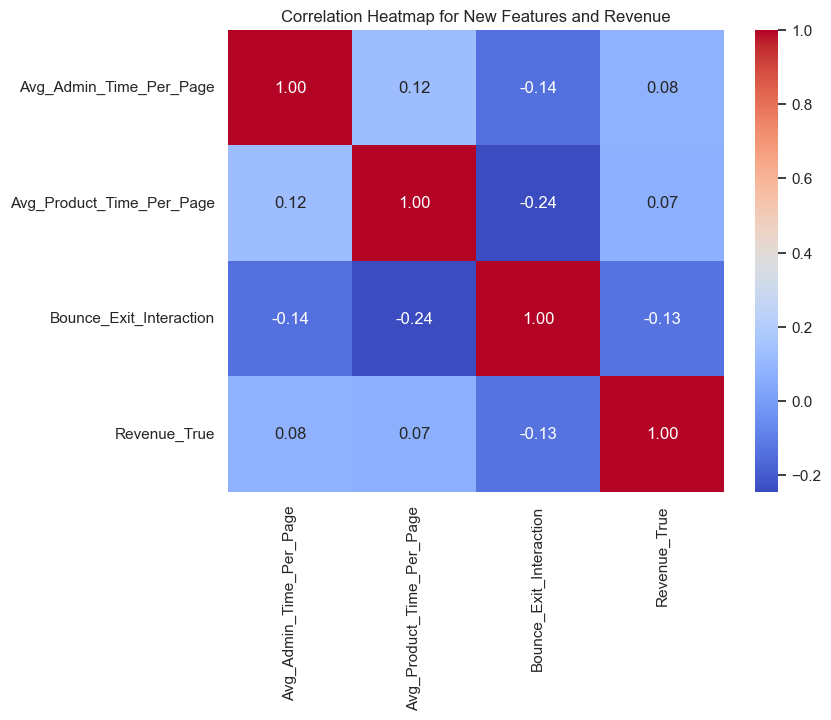

In [85]:
# Feature engineering: Create new features
if 'Administrative_Duration' in df_encoded.columns and 'Administrative' in df_encoded.columns:
    df_encoded['Avg_Admin_Time_Per_Page'] = df_encoded['Administrative_Duration'] / (df_encoded['Administrative'] + 1)

if 'ProductRelated_Duration' in df_encoded.columns and 'ProductRelated' in df_encoded.columns:
    df_encoded['Avg_Product_Time_Per_Page'] = df_encoded['ProductRelated_Duration'] / (df_encoded['ProductRelated'] + 1)

if 'BounceRates' in df_encoded.columns and 'ExitRates' in df_encoded.columns:
    df_encoded['Bounce_Exit_Interaction'] = df_encoded['BounceRates'] * df_encoded['ExitRates']

# Update target_column to match the encoded version of Revenue
target_column = 'Revenue_True'

# Correlation analysis with new features and the updated Revenue column
new_features = ['Avg_Admin_Time_Per_Page', 'Avg_Product_Time_Per_Page', 'Bounce_Exit_Interaction']

# Check correlation of new features with 'Revenue_True'
correlation_matrix = df_encoded[new_features + [target_column]].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visual representation using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for New Features and Revenue')
plt.show()


## 5. Exploratory Data Analysis (EDA):
o Perform univariate analysis on at least three features, including both numerical 
and categorical features. Visualize and interpret the distributions.

o Conduct bivariate analysis to explore relationships between different features. 
Use visualizations like scatter plots, heatmaps, or pair plots.


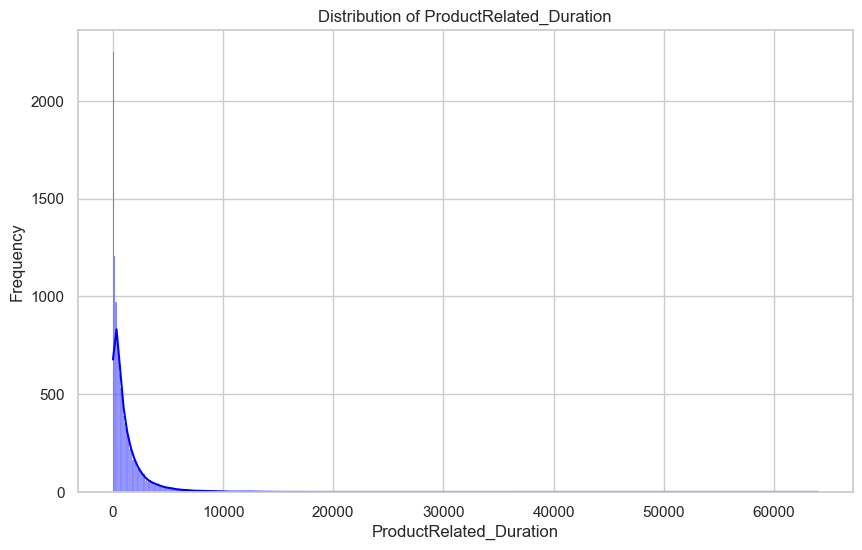

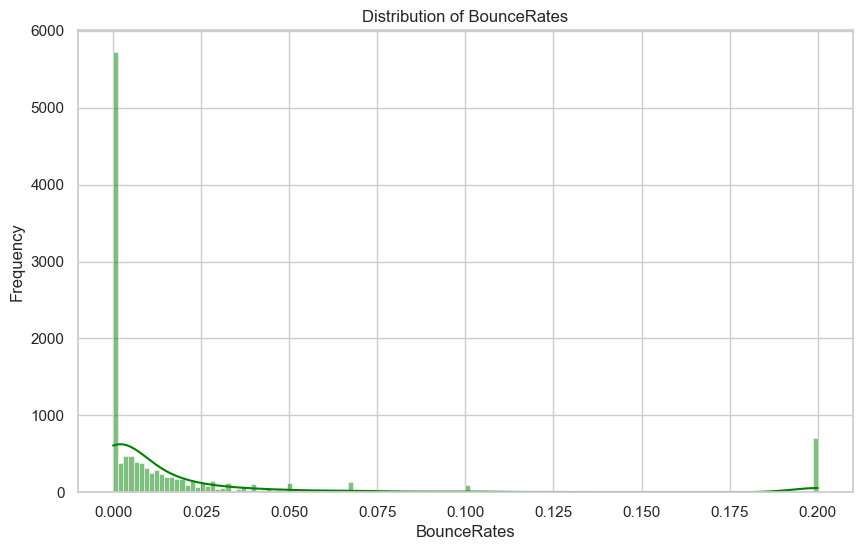

C:\Users\Georg\AppData\Local\Temp\ipykernel_19664\1073628657.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='VisitorType', palette='Set2')


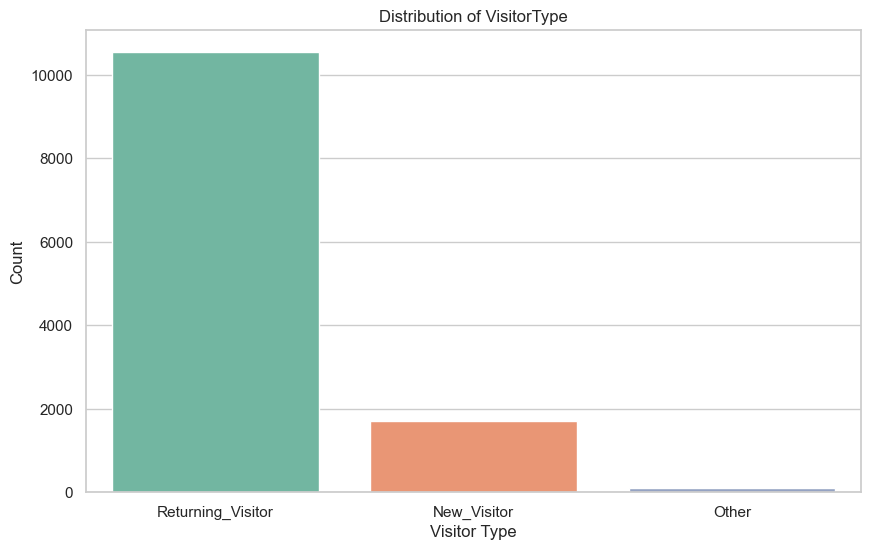

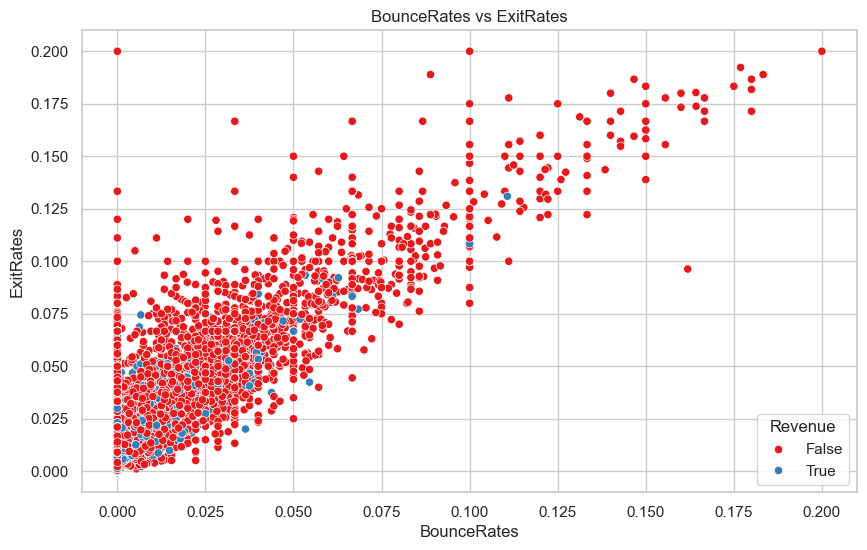

C:\Users\Georg\AppData\Local\Temp\ipykernel_19664\1073628657.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Revenue', y='Administrative_Duration', palette='Set3')


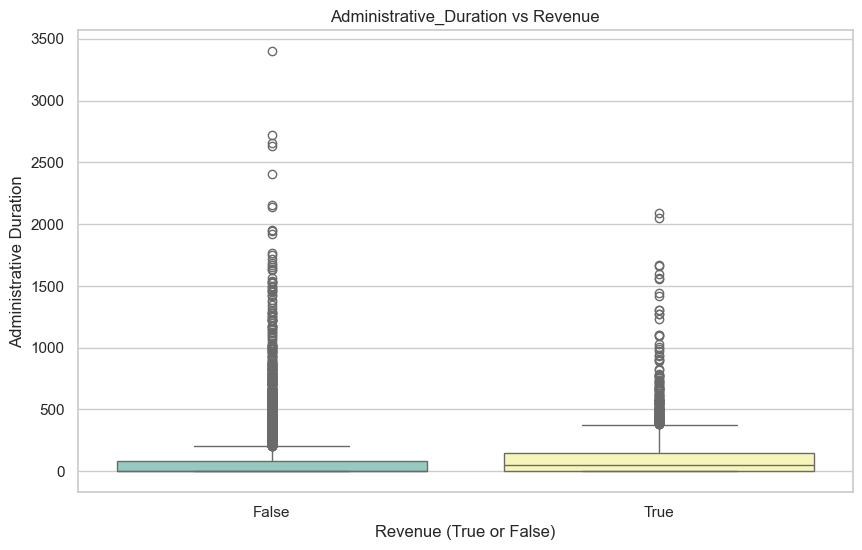

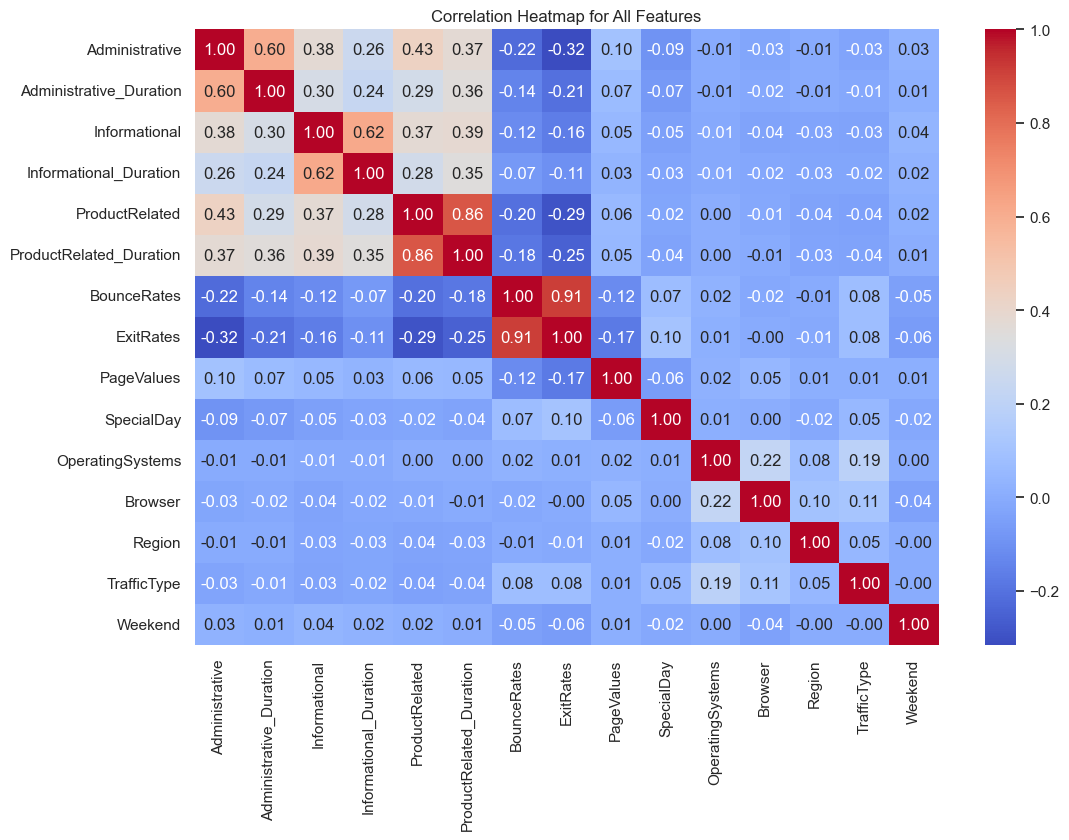

In [86]:


# Set seaborn theme
sns.set_theme(style="whitegrid")

# Univariate Analysis

# 1. ProductRelated_Duration (Numerical)
plt.figure(figsize=(10, 6))
sns.histplot(df['ProductRelated_Duration'], kde=True, color='blue')
plt.title('Distribution of ProductRelated_Duration')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('Frequency')
plt.show()

# 2. BounceRates (Numerical)
plt.figure(figsize=(10, 6))
sns.histplot(df['BounceRates'], kde=True, color='green')
plt.title('Distribution of BounceRates')
plt.xlabel('BounceRates')
plt.ylabel('Frequency')
plt.show()

# 3. VisitorType (Categorical)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='VisitorType', palette='Set2')
plt.title('Distribution of VisitorType')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis

# 1. Scatter plot for BounceRates vs ExitRates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BounceRates', y='ExitRates', hue='Revenue', palette='Set1')
plt.title('BounceRates vs ExitRates')
plt.xlabel('BounceRates')
plt.ylabel('ExitRates')
plt.show()

# 2. Box plot for Administrative_Duration and Revenue
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Revenue', y='Administrative_Duration', palette='Set3')
plt.title('Administrative_Duration vs Revenue')
plt.xlabel('Revenue (True or False)')
plt.ylabel('Administrative Duration')
plt.show()

# 3. Heatmap for Correlation between numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)  # Avoid warning for non-numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for All Features')
plt.show()


## 6. Outlier Detection and Handling:
o Identify outliers in the dataset if any

o Discuss the impact of outliers on your analysis and decide whether to remove 
or transform them.

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to detect and remove outliers based on IQR
def detect_and_remove_outliers(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    outliers_removed = False
    
    for column in numeric_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not outliers.empty:
            outliers_removed = True
            print(f'Outliers detected in column: {column}')
            print(f'Number of outliers in {column}: {outliers.shape[0]}')

            # Remove outliers
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    if outliers_removed:
        print("\nOutliers were detected and removed.")
    else:
        print("\nNo significant outliers detected.")
    
    return df

# Detect and remove outliers from the dataset
df_cleaned = detect_and_remove_outliers(df)

# Display the cleaned dataset's shape
print(f"\nData shape after outlier removal: {df_cleaned.shape}")


Outliers detected in column: Administrative
Number of outliers in Administrative: 404
Outliers detected in column: Administrative_Duration
Number of outliers in Administrative_Duration: 1084
Outliers detected in column: Informational
Number of outliers in Informational: 1894
Outliers detected in column: ProductRelated
Number of outliers in ProductRelated: 622
Outliers detected in column: ProductRelated_Duration
Number of outliers in ProductRelated_Duration: 494
Outliers detected in column: BounceRates
Number of outliers in BounceRates: 1028
Outliers detected in column: ExitRates
Number of outliers in ExitRates: 131
Outliers detected in column: PageValues
Number of outliers in PageValues: 1031
Outliers detected in column: SpecialDay
Number of outliers in SpecialDay: 626
Outliers detected in column: OperatingSystems
Number of outliers in OperatingSystems: 50
Outliers detected in column: Browser
Number of outliers in Browser: 1852
Outliers detected in column: TrafficType
Number of outlier

## 7. Data Visualization:
o Create meaningful visualizations (e.g., histograms, box plots, bar charts) to 
summarize the key findings from your EDA. Explain the insights gained from 
these visualizations.


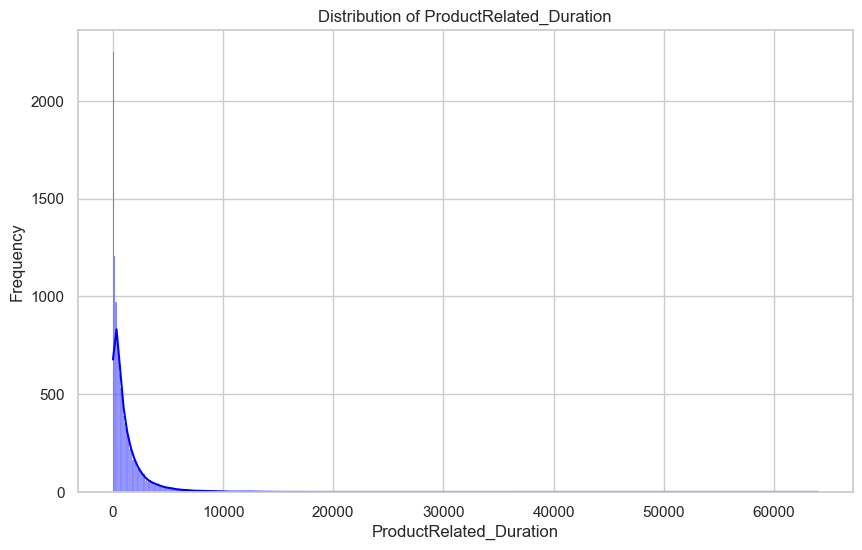

C:\Users\Georg\AppData\Local\Temp\ipykernel_19664\3929520945.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Revenue', y='BounceRates', palette='Set3')


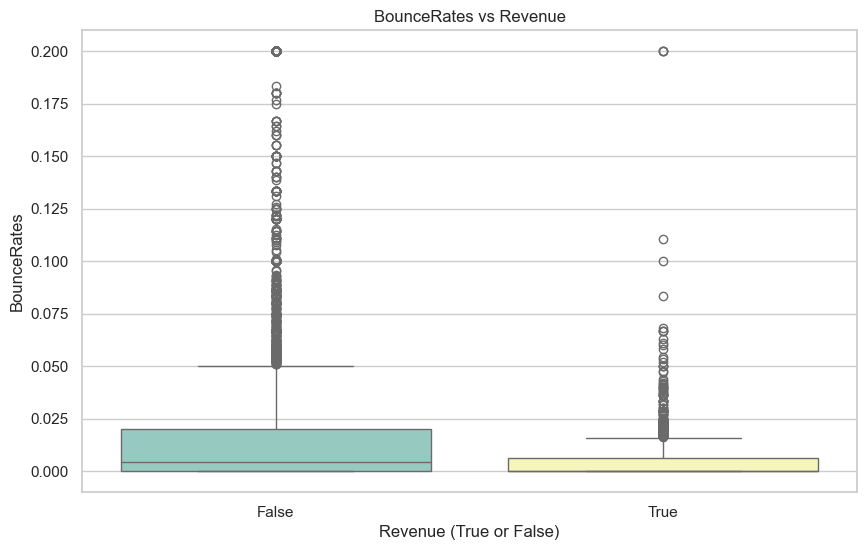

C:\Users\Georg\AppData\Local\Temp\ipykernel_19664\3929520945.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='VisitorType', palette='Set2')


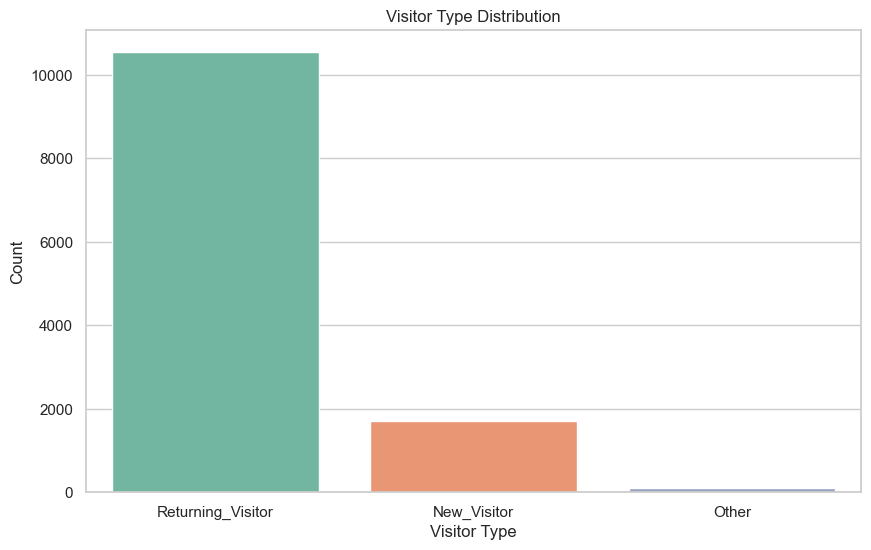

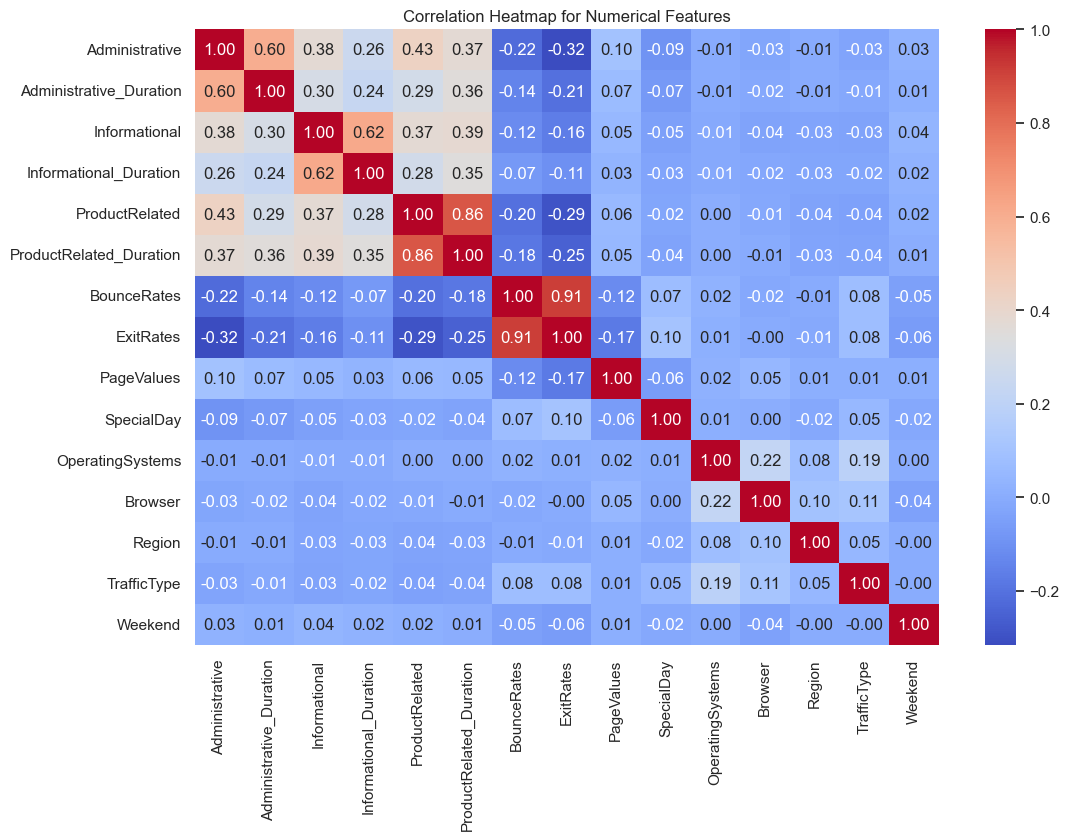

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ProductRelated_Duration'], kde=True, color='blue')
plt.title('Distribution of ProductRelated_Duration')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Revenue', y='BounceRates', palette='Set3')
plt.title('BounceRates vs Revenue')
plt.xlabel('Revenue (True or False)')
plt.ylabel('BounceRates')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='VisitorType', palette='Set2')
plt.title('Visitor Type Distribution')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()


## 8. Correlation Analysis:
o Calculate the correlation matrix for the numerical features in the dataset. 
Identify and discuss any strong correlations or lack thereof. How might this 
influence model selection?

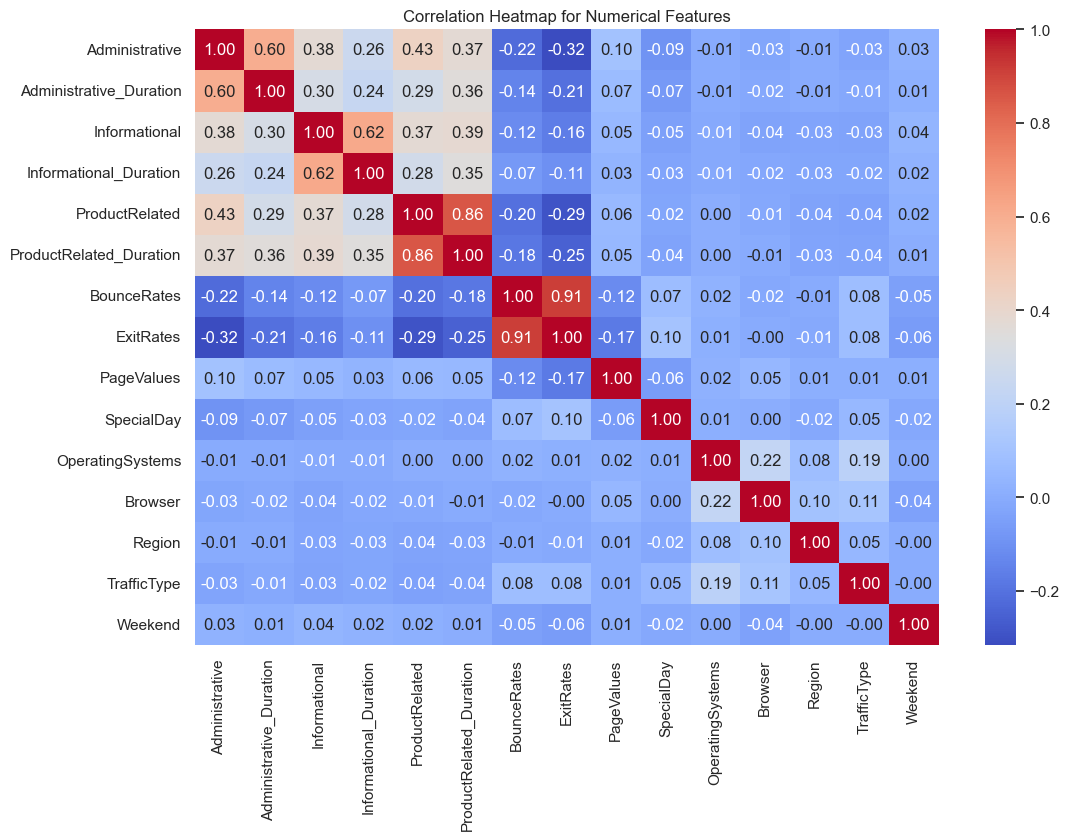

In [89]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()


## 9. Summary and Insights:
o Summarize the key findings from your data preprocessing and EDA. Discuss 
how these findings will influence your approach to building a machine 
learning model on this dataset.

o Suggest any further steps or considerations that should be taken before 
proceeding to model building9. Summary and Insights:

o Summarize the key findings from your data preprocessing and EDA. Discuss 
how these findings will influence your approach to building a machine 
learning model on this dataset.

o Suggest any further steps or considerations that should be taken before 
proceeding to model building